In [1]:
import pandas as pd
import zipfile
import pandas as pd

In [2]:
df = pd.read_csv('data/comentariosgames.csv')
df.head()

,id,Comentario
0,1,19 years ago… we were just getting started. Ha...
1,2,saw this on my timeline so I posted here pleas...
2,3,Could we see this armour make an appearance in...
3,4,I mean. You can play the Anniversary 360 editi...
4,5,Happy birthday to the game that started it all!


In [3]:
df.shape

(40, 2)

In [4]:
df.Comentario[0]

'19 years ago… we were just getting started. Happy Birthday to the game that started it all, Halo: Combat Evolved'

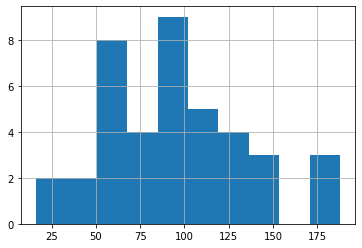

In [5]:
df['Comentario'].str.len().hist()

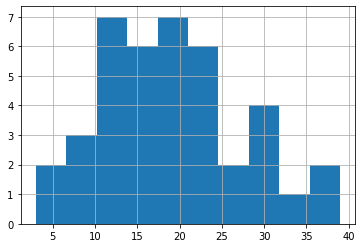

In [6]:
df.Comentario.str.split().map(lambda x: len(x)).hist()

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


False

In [8]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [9]:
corpus = []
news = df.Comentario.str.split().values.tolist()
corpus = [word for i in news for word in i]

In [10]:
from collections import defaultdict #{key: 'value'}
dic = defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word] += 1

<BarContainer object of 10 artists>

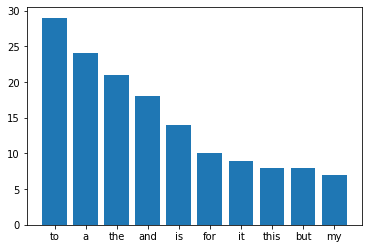

In [11]:
import matplotlib.pyplot as plt

top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]
x, y = zip(*top)
plt.bar(x, y)

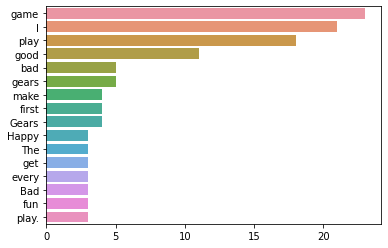

In [12]:
import seaborn as sns
from collections import Counter

most=Counter(corpus).most_common()
x, y = [], []

for word, count in most[:50]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)

In [13]:
from nltk.util import ngrams
list(ngrams(['I', 'went', 'to', 'the', 'river'], 2))

[('I', 'went'), ('went', 'to'), ('to', 'the'), ('the', 'river')]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

new= df.Comentario.str.split().values.tolist()
corpus=[word for i in new for word in i]

n = 2
vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 

In [15]:
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
words_freq

[('memories besides', 1), ('12 17', 1)]

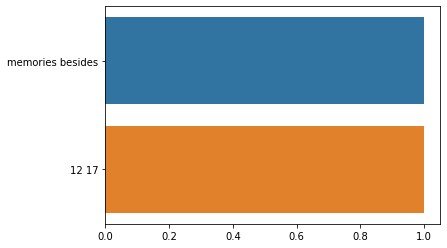

In [16]:
x, y = map(list, zip(*words_freq))
sns.barplot(x = y, y = x)

In [17]:
from textblob import TextBlob
#polarity: range[-1,1] donde 1: positivo (+) y -1: negativo (-)
#subjectivity: range[0, 1]
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [18]:
TextBlob('I am living a happy life').sentiment

Sentiment(polarity=0.8, subjectivity=1.0)

In [19]:
TextBlob('today is a bad day').sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [20]:
def _polarity(text):
    return TextBlob(text).sentiment.polarity

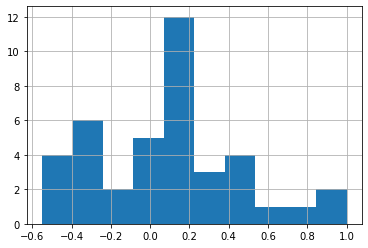

In [21]:
df.Comentario.apply(lambda x: _polarity(x)).hist()

In [22]:
def _subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

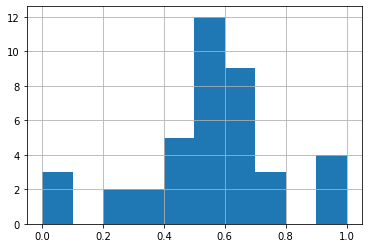

In [23]:
df.Comentario.apply(lambda x: _subjectivity(x)).hist()